In [1]:
import os
from pprint import pformat

import joblib
import optuna
import plotly
from matplotlib import pyplot as plt

In [2]:
def study_info(study):
   print("Best accuracy:", study.best_value)
   print("Best hyperparameters:")
   print(pformat(study.best_trial.params))
   print()
   print("Hyperparameter importances:")
   print(pformat(optuna.importance.get_param_importances(study)))

## Sim2Real initial

In [3]:
study = joblib.load(os.path.join("RAW", "optuna_studies", "ARotor_h_opt_ARotor_05-12_15-54-33.pkl"))

best_trials = optuna.create_study()
for trial in sorted(study.trials, key=lambda t: t.value, reverse=True)[:8]:
    best_trials.add_trial(trial)
    
study_info(study)

[I 2023-05-12 15:59:26,838] A new study created in memory with name: no-name-1836d4d7-9721-405a-aab2-8ba6eb5008f1


Best accuracy: 0.37611111111111106
Best hyperparameters:
{'cl_dropout': 0.30000000000000004,
 'embedding_multiplier': 10,
 'fc_dropout': 0.30000000000000004,
 'learning_rate': 0.0017137784641783026,
 'momentum': 0.918497575157115,
 'sch_gamma': 0.9627691959557483,
 'weight_decay': 0.0009615365938857682}

Hyperparameter importances:
OrderedDict([('embedding_multiplier', 0.3690062033276913),
             ('weight_decay', 0.15152427913097652),
             ('cl_dropout', 0.1145256479115187),
             ('sch_gamma', 0.10190690025811766),
             ('learning_rate', 0.1002600373364346),
             ('fc_dropout', 0.09543906572989366),
             ('momentum', 0.06733786630536762)])


/var/folders/cx/1v2hhggj48s5vpt1wv2m167h0000gp/T/ipykernel_30085/1455980257.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

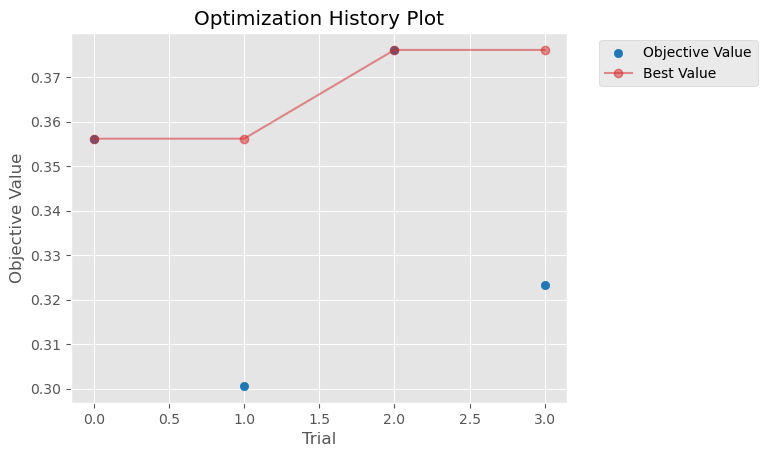

In [4]:
optuna.visualization.matplotlib.plot_optimization_history(study)

In [5]:
optuna.visualization.plot_slice(study)

In [6]:
optuna.visualization.plot_slice(best_trials)